## Importing Dependencies 

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import time 

## Loading in Stock Symbols

In [2]:
# I got these csvs through another API, I didn't put it in here, as I only have limited uses (20 in total)
df = pd.read_csv("Resources/Stock_Code.csv")
sp500 = pd.read_csv("Resources/sp500.csv")

In [3]:
df.head()

,Code,Name,Country,Exchange,Currency,Type,Isin
0,A,Agilent Technologies Inc,USA,NYSE,USD,Common Stock,US00846U1016
1,AA,Alcoa Corp,USA,NYSE,USD,Common Stock,US0138721065
2,AAA,Listed Funds Trust - AAF First Priority CLO Bo...,USA,NYSE ARCA,USD,ETF,US53656F6566
3,AAC,AAC Holdings Inc,USA,NYSE,USD,Common Stock,KYG330321061
4,AAIC,Arlington Asset Investment Corp,USA,NYSE,USD,Common Stock,US0413562051


In [4]:
df.rename({"Code": "Symbol"}, axis = 1, inplace = True)

In [5]:
NYSE = df[(df["Exchange"] == "NYSE") & (df["Type"] == "Common Stock")]

In [6]:
sp500.head()

,Symbol,Name,Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ABMD,Abiomed,Health Care


In [7]:
sp500 = sp500[["Symbol", "Sector"]]

In [8]:
HealthCare = sp500[sp500["Sector"] == "Health Care"]

## Filter for Health Care Stocks 

-----

For these I focused on HealthCare Companies to narrow down are stock options (as there are too many). This is just tentative and can be changed.

In [9]:
combine = pd.merge(NYSE, HealthCare, on = "Symbol")

In [10]:
combine.head()

,Symbol,Name,Country,Exchange,Currency,Type,Isin,Sector
0,A,Agilent Technologies Inc,USA,NYSE,USD,Common Stock,US00846U1016,Health Care
1,ABBV,AbbVie Inc,USA,NYSE,USD,Common Stock,US00287Y1091,Health Care
2,ABC,AmerisourceBergen,USA,NYSE,USD,Common Stock,US03073E1055,Health Care
3,ABT,Abbott Laboratories,USA,NYSE,USD,Common Stock,US0028241000,Health Care
4,BAX,Baxter International Inc,USA,NYSE,USD,Common Stock,US0718131099,Health Care


## Extraction of  Meta Data to Rank Companies 
-----

* We can have a lot more columns than these, in fact over 50+ columns. I just choose a few - we should probably rank the companies that we would want to invest in based on key statistical insights. 

In [11]:
### Creation of Empty Columns to iterrow

combine["Book/Price"] = ""
combine["PEG Ratio"] = ""
combine["Price to Earning Ratio"] = ""
combine["Revenue"] = ""
combine["Total Debt/Equity"] = ""

for index, row in combine.iterrows():
    
    try:
    
        symbol = yf.Ticker(combine.loc[index, "Symbol"])
    
        print(f"Commence Extraction of {symbol} data")
        time.sleep(2)
        info = symbol.info
        combine.loc[index, "Book/Price"] = info["priceToBook"]
        combine.loc[index, "PEG Ratio"] = info["pegRatio"]
        combine.loc[index, "Price to Earning Ratio"] = info["forwardPE"]
        combine.loc[index, "Total Debt/Equity"] = info["debtToEquity"]
        combine.loc[index, "Revenue"] = info["totalRevenue"]
    
    except Exception:
        print(f"{symbol} not found")

Commence Extraction of yfinance.Ticker object <A> data
Commence Extraction of yfinance.Ticker object <ABBV> data
Commence Extraction of yfinance.Ticker object <ABC> data
Commence Extraction of yfinance.Ticker object <ABT> data
Commence Extraction of yfinance.Ticker object <BAX> data
Commence Extraction of yfinance.Ticker object <BDX> data
Commence Extraction of yfinance.Ticker object <BIO> data
Commence Extraction of yfinance.Ticker object <BMY> data
Commence Extraction of yfinance.Ticker object <BSX> data
Commence Extraction of yfinance.Ticker object <CAH> data
Commence Extraction of yfinance.Ticker object <CI> data
Commence Extraction of yfinance.Ticker object <CNC> data
Commence Extraction of yfinance.Ticker object <COO> data
Commence Extraction of yfinance.Ticker object <CRL> data
Commence Extraction of yfinance.Ticker object <CTLT> data
Commence Extraction of yfinance.Ticker object <CVS> data
Commence Extraction of yfinance.Ticker object <DGX> data
Commence Extraction of yfinance.

In [21]:
combine.rename({"Book/Price": "Price/Book"}, axis = 1, inplace = True)

In [19]:
combine.drop("Total Debt", axis = 1, inplace = True)

# Thesis: Which Stocks are Overvalued/Undervalued in the Market? And If so, what is a basic linear regression of the futures?
----

* Overvalued stock presents an opportunity to go "Short" 
* Undervalued stock presents an opportunity to go "Long"
* By categorizing the stocks in healthcare or any other industry, we can provide insights whether to short or go long on certain stocks 

## Meaning of Valuations Measurements 
----

| Column        | Definition                                                                                                                                                                                                                                                |
|---------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| PEG           | Price/Earning to Growth Ratio. This is a measurement of how under/over valued a stock is - if the PEG is less than 1.0, it suggest that the stock is undervalued, and vise-versa if above 1. If this value is negative then the company is losing money.  |
| Price/Book    | Measures the valuation of the company values to the its book value. Price to Book under 1 showcases that the stock is undervalued whereas above 1 suggest that the stock is overvalued.                                                                   |
| Price/Earning | A P/E (Market Value per Share/ Earning Per Share) ratio holds the most value to an analyst when compared against similar  companies in the same industry. A high P/E means that the stock is over-valued - expected high growth.                          |

In [35]:
combine.head()

,Symbol,Name,Country,Exchange,Currency,Type,Isin,Sector,Price/Book,PEG Ratio,Price to Earning Ratio,Revenue,Total Debt/Equity
0,A,Agilent Technologies Inc,USA,NYSE,USD,Common Stock,US00846U1016,Health Care,8.644095,2.25,24.678343,6848000000,52.354
1,ABBV,AbbVie Inc,USA,NYSE,USD,Common Stock,US00287Y1091,Health Care,17.821760,-28.52,13.858985,57819000832,436.757
2,ABC,AmerisourceBergen,USA,NYSE,USD,Common Stock,US03073E1055,Health Care,0.000000,1.68,13.525357,238587002880,9435.978
3,ABT,Abbott Laboratories,USA,NYSE,USD,Common Stock,US0028241000,Health Care,5.257808,2.47,24.394560,45029998592,46.204
4,BAX,Baxter International Inc,USA,NYSE,USD,Common Stock,US0718131099,Health Care,5.147983,2.77,15.530219,14739999744,302.671


In [23]:
combine.to_csv("Output/SummaryStockData.csv", index = False)

### Boxplot of Valuation Ratios in the HealthCare Industry

In [34]:
combine = combine.replace("None", 0)
combine = combine.fillna(0)

In [29]:
columns = ['Price/Book', 'PEG Ratio', 'Price to Earning Ratio']

for column in columns:
    combine[column] = combine[column].astype(float)

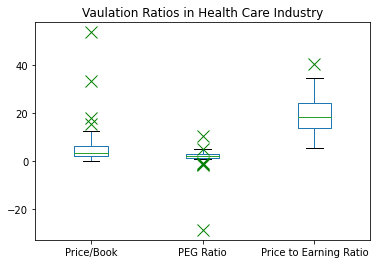

In [45]:
import matplotlib.pyplot as plt 

#formating fliers 
flierprops = dict(marker='x', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')

combine.boxplot(column = ["Price/Book", "PEG Ratio", "Price to Earning Ratio"], flierprops=flierprops,
               grid = False)

plt.title("Vaulation Ratios in Health Care Industry")

plt.show()

## Other Infomation that we can potentially explore

---

* this is just one company, but obviously we can get the rest into a dataframe 

In [25]:
from pprint import pprint 

summary_info = symbol.info

pprint(summary_info)

{'52WeekChange': -0.33755994,
 'SandP52WeekChange': -0.13534117,
 'address1': '10 Sylvan Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 0,
 'askSize': 800,
 'averageDailyVolume10Day': 1986510,
 'averageVolume': 2241042,
 'averageVolume10days': 1986510,
 'beta': 0.73667,
 'beta3Year': None,
 'bid': 0,
 'bidSize': 1000,
 'bookValue': 9.997,
 'category': None,
 'circulatingSupply': None,
 'city': 'Parsippany',
 'coinMarketCapLink': None,
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 154.14,
 'currentRatio': 2.275,
 'dateShortInterest': 1668470400,
 'dayHigh': 154.18,
 'dayLow': 146.91,
 'debtToEquity': 145.495,
 'dividendRate': 1.3,
 'dividendYield': 0.0088,
 'earningsGrowth': -0.026,
 'earningsQuarterlyGrowth': -0.042,
 'ebitda': 3251000064,
 'ebitdaMargins': 0.40602002,
 'enterpriseToEbitda': 22.52,
 'enterpriseToRevenue': 9.144,
 'enterpriseValue': 73212248064,
 'exDividendDate': 16671744

In [18]:
symbol.financials

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Research Development,508000000.0,463000000.0,457000000.0,432000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,2488000000.0,1996000000.0,1801000000.0,1690000000.0
Minority Interest,1000000.0,4000000.0,4000000.0,4000000.0
Net Income,2037000000.0,1638000000.0,1500000000.0,1428000000.0
Selling General Administrative,2001000000.0,1713000000.0,1636000000.0,1482000000.0
Gross Profit,5481000000.0,4637000000.0,4345000000.0,3922000000.0
Ebit,2811000000.0,2301000000.0,2097000000.0,1891000000.0
Operating Income,2811000000.0,2301000000.0,2097000000.0,1891000000.0
Other Operating Expenses,None,None,None,None


In [16]:
# get historical market data
hist = symbol.history(period="max")

In [17]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-02-01 00:00:00-05:00,29.410472,29.634552,28.448796,28.952976,66789100,0.0,0
2013-02-04 00:00:00-05:00,29.027679,29.867978,28.719569,28.962322,7695400,0.0,0
2013-02-05 00:00:00-05:00,29.177053,29.858628,28.803587,28.980984,5013200,0.0,0
2013-02-06 00:00:00-05:00,28.924965,29.345115,28.710222,28.971649,2126100,0.0,0
2013-02-07 00:00:00-05:00,28.943640,30.558882,28.943640,29.877306,3800800,0.0,0
...,...,...,...,...,...,...,...
2022-11-23 00:00:00-05:00,148.699997,151.199997,148.380005,150.470001,1445900,0.0,0
2022-11-25 00:00:00-05:00,150.470001,150.850006,148.649994,150.100006,889500,0.0,0
2022-11-28 00:00:00-05:00,149.460007,149.979996,147.820007,148.130005,1633300,0.0,0
